**Class 2: Bellman equations, characterizing optimal policies**


1. [Everything you need to know](#everything)
2. [Reminder](#reminder)
3. [The Bellman equations](#bellman)
    1. [State-action value functions](#Qfunc)
    6. [Evaluation equation](#eval)
    7. [Optimality equation](#optimality)
4. [Model-based algorithms](#model)
    1. [Value Iteration](#vi)
    2. [Policy Iteration and Modified Policy Iteration](#pi)
4. [Approximate Dynamic Programming](#adp)
    1. [Approximate Value Iteration](#avi)
    2. [Approximate Policy Iteration](#api)
5. [Linear Programming](#lp)
6. [Asynchronous Dynamic Programming](#asyncdp)
    1. [Asynchronous Value Iteration](#asyncvi)
    2. [Asynchronous Policy Iteration](#asyncpi)

The previous class (RL1) introduced the model of Markov Decision Processes as a way to describe discrete-time, stochastic, dynamical systems. Our focus is on controling such systems. For this we want to characterize what makes a policy optimal and how to find it.

<div class="alert alert-warning">

**Prerequisites:**
- Systems of linear equations
- Contraction mappings
- Definition of a Markov Decision Process, a policy, a value function

**Useful but not compulsory:**
- Dynamic Programming
- Linear Programming
<div>

# <a id="everything"></a>Everything you need to know


Everything you should remember after this session.
<div class="alert alert-success">
<ul>
<li> Evaluation equation: $V^\pi \in \mathcal{F}\left(S,\mathbb{R}\right)$ is the only solution to $V\left(s\right) = (T^\pi V)(s) = r\left(s,\pi\left(s\right)\right) + \gamma \sum\limits_{s'\in S} p\left(s'|s,\pi\left(s\right)\right) V\left(s'\right)$<br>
Similarly, $Q^\pi \in \mathcal{F}\left(S\times A,\mathbb{R}\right)$ is the only solution to $Q\left(s,a\right) = (T^\pi Q)(s,a) = r\left(s,a\right) + \gamma \sum\limits_{s'\in S} p\left(s'|s,a\right) Q\left(s', \pi\left(s'\right)\right)$
<li> Properties of $T^\pi$ 1) $V=T^\pi V$ is a linear system, 2) $T^\pi$ is a contraction mapping over $\mathcal{F}(S,\mathbb{R})$ or $\mathcal{F}(S\times A,\mathbb{R})$.
<li> Finding $V^\pi$ or $Q^\pi$: by matrix inversion or by repeatedly applying $T^\pi$ to any initial function.
<li> Optimality equation: $V^* \in \mathcal{F}\left(S,\mathbb{R}\right)$ is the only solution to $V(s) = (T^* V) (s) = \max\limits_{a\in A} \left[ r(s,a) + \gamma \sum\limits_{s'\in S} p(s'|s,a) V(s') \right]$<br>
Similarly, $Q^* \in \mathcal{F}\left(S\times A,\mathbb{R}\right)$ is the only solution to $Q(s,a) = (T^* Q) (s,a) = r(s,a) + \gamma \sum\limits_{s'\in S}p(s'|s,a) \max\limits_{a'\in A} Q(s',a')$
<li> $T^*$ is a contraction mapping.
<li> Value Iteration: finding $V^*$ or $Q^*$ by repeatedly applying $T^*$ to any initial function.
<li> Policy Iteration: finding $V^*$ or $Q^*$ and $\pi^*$ by building the sequence $\pi_{n+1}(s) = \arg\max_{a\in A} Q^{\pi_n}(s,a)$ that converges to $\pi^*$. Repeatedly alternates an evaluation and an improvement phase.
<li> Modified Policy Iteration: apply $T^\pi$ for $m$ steps (evaluation phase), then define $\pi$ as the greedy policy (improvement phase) and repeat.
<li> Approximate Value Iteration and Approximate Policy Iteration consist in approximating value functions within Value and Policy Iterations. They do not converge but reach policies whose values are within a bounded range of the optimal value function.
</ul>
</div>

Of course, all this seems very obscure right now and the block above will only serve as a reminder when you re-open the notebook later. We will introduce every concept intuitively and progessively.

# <a id="reminder"></a>Reminder

Recall the main results from the previous class.

We have introduced the general **discrete-time stochastic optimal control problem**:
- Environment (discrete time, non-deterministic, non-linear, Markov) $\leftrightarrow$ MDP.
- Behaviour $\leftrightarrow$ control policy $\pi : s\mapsto a$.
- Policy evaluation criterion $\leftrightarrow$ $\gamma$-discounted criterion.
- Goal $\leftrightarrow$ Maximize value function $V^\pi(s)$.

Based on the analysis of the previous section, we introduce several algorithms that will lay a solid ground for model-free RL algorithms in the next class.

# <a id="bellman"></a> The Bellman equations

## <a id="Qfunc"></a>State-action value functions

Let's play a little bit (mathematically) with our new toys.<br>

<div class="alert alert-warning"><b>Question</b><br>
What's the value of "$a$ for the first step, then $\pi$, starting from $s$"?
</div>

Note: the answer uses the discounted criterion's definition and the value function of $\pi$.<br>

<div class="alert alert-danger"><a href="#answersQsa" data-toggle="collapse"><b>Answer:</b></a><br>
<div id="answersQsa" class="collapse">
\begin{align*}
Q^\pi(s,a) & = \mathbb{E}\left( \sum\limits_{t=0}^\infty \gamma^t r\left(S_t, A_t\right) \bigg| S_0 = s, A_0=a, \pi \right)\\
 & = r\left(s,a\right) + \mathbb{E}\left( \sum\limits_{t=1}^\infty \gamma^t r\left(S_t, A_t\right) \bigg| S_0 = s, A_0 = a, \pi \right)\\
 & = r\left(s,a\right) + \gamma \sum\limits_{s'\in S} p\left(s'|s,a\right) \mathbb{E}\left( \sum\limits_{t=1}^\infty \gamma^{t-1} r\left(S_t, A_t\right) \bigg| S_1 = s', \pi \right)\\
 & = r\left(s,a\right) + \gamma \sum\limits_{s'\in S} p\left(s'|s,a\right) V^\pi\left(s'\right)
\end{align*}
</div>
</div>

$$ Q^\pi(s,a) = \mathbb{E}_{s'} \left[ r(s,a,s') + \gamma V^{\pi}(s')\right]$$

Note that we have introduced the very important state-action value function $Q^\pi$.
<div class="alert alert-success"><b>State-action value function</b><br>
$$Q^\pi(s,a) = \mathbb{E}\left( \sum\limits_{t=0}^\infty \gamma^t r\left(S_t, A_t\right) \bigg| S_0 = s, A_0=a, \pi \right)$$
</div>

To be precise and reuse the full notations from the MDP definition:
$Q^\pi(s,a)=\mathbb{E}\left[ \sum\limits_{t = 0}^\infty \gamma^t R_t \quad \Bigg| \quad \begin{array}{l}S_0 = s, A_0=a,\\ A_t=\pi(S_t)\textrm{ for }t>0,\\ S_{t+1}\sim p(\cdot|S_t,A_t),\\R_t = r(S_t,A_t,S_{t+1})\end{array} \right].$

$$Q^\pi(s,a) = \mathbb{E}_{s'} \left[ r(s,a,s') + \gamma V^\pi(s') \right]$$

$$Q^\pi(s,a) = r(s,a) + \gamma \mathbb{E}_{s'} \left[ V^\pi(s') \right]$$

<br>
<br>
<img src="img/Qfunctions.png" style="height: 200px;"></img>

<div class="alert alert-warning"><b>Exercise</b><br>
Write a function that computes $Q^\pi$ given $V^\pi$ for FrozenLake. Use $\gamma=0.9$.<br>
Suppose $V^\pi(s)=0$ in all $s$. Use your function to compute $Q^\pi(s,a)$ given $V^\pi$. Comment.
</div>

To help you, recall that in the previous class, we introduced a few utility functions and accessed the transition probabilities and rewards of FrozenLake using the `env.unwrapped.P` attribute as in the example below.

In [1]:
import gym
import gym.envs.toy_text.frozen_lake as fl

env = gym.make('FrozenLake-v0')
actions = {fl.LEFT: '\u2190', fl.DOWN: '\u2193', fl.RIGHT: '\u2192', fl.UP: '\u2191'}

def to_s(row,col):
    return row*env.unwrapped.ncol+col

def to_row_col(s):
    col = s%env.unwrapped.ncol
    row = int((s-col)/env.unwrapped.ncol)
    return row,col

state = to_s(0,1)
action = 0
outcomes = env.unwrapped.P[state][action]
print(outcomes)
print()
print("outcomes for the transition from state ", to_row_col(state), " and action ", actions[action], ":", sep='')
for o in outcomes:
    proba      = o[0]
    next_state = o[1]
    reward     = o[2]
    isTerminal = o[3]
    print(" reach state ", to_row_col(next_state), \
          " and get reward ", reward, \
          " with proba ", proba, ". ", sep='', end="")
    if isTerminal:
        print("Transition is terminal.")
    else:
        print("Transition is not terminal.")
        
_=env.render()

[(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True)]

outcomes for the transition from state (0, 1) and action ←:
 reach state (0, 1) and get reward 0.0 with proba 0.3333333333333333. Transition is not terminal.
 reach state (0, 0) and get reward 0.0 with proba 0.3333333333333333. Transition is not terminal.
 reach state (1, 1) and get reward 0.0 with proba 0.3333333333333333. Transition is terminal.

SFFF
FHFH
FFFH
HFFG


In [21]:
import numpy as np

env = gym.make('FrozenLake-v0')
gamma = 0.9

def Q_from_V(V, env, gamma=0.9):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    for s in range(env.observation_space.n):
        for a in range(env.action_space.n):
            outcomes = env.unwrapped.P[s][a]
            for p, s2, r, _ in outcomes:
                Q[s,a] += p*(r + gamma*V[s2])
    return Q

V = np.zeros((env.observation_space.n))
Q = Q_from_V(V, env)
print(Q)

[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         0.        ]]


In [17]:
# %load solutions/RL2_exercise1.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

import gym
import gym.envs.toy_text.frozen_lake as fl
import numpy as np

env = gym.make('FrozenLake-v0')
gamma = 0.9

def Q_from_V(V):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    for s in range(env.observation_space.n):
        for a in range(env.action_space.n):
            outcomes = env.unwrapped.P[s][a]
            for o in outcomes:
                p  = o[0]
                s2 = o[1]
                r  = o[2]
                Q[s,a] += p*(r+gamma*V[s2])
    return Q

V = np.zeros((env.observation_space.n))
Q = Q_from_V(V)
print(Q)

[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         0.        ]]


That's interesting: given a policy $\pi$, the best one-step lookahead action can be selected by maximizing $Q^\pi$. To improve on a policy $\pi$, it is more useful to know $Q^\pi$ than $V^\pi$ and pick the *greedy* action.

<div class="alert alert-warning"><b>Exercise</b><br>
Write a function that takes a $Q$ function for FrozenLake and returns the greedy policy.<br>
Use the function below to print the greedy policy for the $Q$ function of the previous exercise in a human-friendly format.<br>
Comment.
</div>

In [13]:
def print_policy(pi):
    for row in range(env.unwrapped.nrow):
        for col in range(env.unwrapped.ncol):
            print(actions[pi[to_s(row,col)]], end='')
        print()
    return

In [22]:
def greedy_policy(Q):
    pi = np.zeros(env.observation_space.n)
    for s in range(env.observation_space.n):
        pi[s] = np.argmax(Q[s,:])
    return pi

pi = greedy_policy(Q)
print(pi)
print_policy(pi)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
←←←←
←←←←
←←←←
←←↓←


In [23]:
# %load solutions/RL2_exercise2.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

import gym
import gym.envs.toy_text.frozen_lake as fl
import numpy as np

env = gym.make('FrozenLake-v0')

def greedyQpolicy(Q):
    pi = np.zeros((env.observation_space.n),dtype=np.int)
    for s in range(env.observation_space.n):
        pi[s] = np.argmax(Q[s,:])
    return pi
    
pi = greedyQpolicy(Q)
print(pi)
print_policy(pi)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
←←←←
←←←←
←←←←
←←↓←


Let's take a minute to really understand the importance of these $Q$-functions.
- If one provides me with $Q^\pi$ for a given $\pi$, then I have a way to select a good action in any state $s$ I might encounter (by picking action $\arg\max_a Q^\pi(s,a)$.
- $Q^\pi$ is "what I can expect to get if I perform $a$ for $1$ step and then follow $\pi$ for $\infty$ steps".
- So $Q^\pi(s,a) = r(s,a) + \gamma \mathbb{E}_{s'} \left[ V^\pi(s') \right]$

## <a id="eval"></a>Evaluation equation

Let's remark that $V^\pi(s) = Q^\pi(s,\pi(s))$. Let's replace $a$ by $\pi(s)$ above and we obtain an important equation to characterize $V^\pi$.
<br>
<br>
<img src="img/V-DP.png" style="height: 200px;"></img>
$$V^\pi(s) = r(s,\pi(s)) + \gamma \mathbb{E}_{s'\sim p(s'|s,\pi(s))} \left[ V^\pi(s') \right]$$

This equation uses $V^\pi(s')$ in all $s'$ reachable from $s$ to define $V^\pi(s)$.  
Since this equation is true in all $s$, this provides as many equations as we have states.

<div class="alert alert-success"><b>Evaluation equation</b><br>
$V^\pi$ obeys the linear system of equations:
$$
V^\pi\left(s\right) = r(s,\pi(s)) + \gamma \mathbb{E}_{s'\sim p(s'|s,\pi(s))} \left[ V^\pi(s') \right]\\
$$
Similarly:
$$
Q^\pi\left(s,a\right) = r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} \left[ Q^\pi(s',\pi(s')) \right]
$$
</div>

This leads to the introduction of the **Bellman evaluation operator**:
<div class="alert alert-success"><b>Evaluation operator $T^\pi$</b><br>
$T^\pi$ is an operator on value functions, that transforms a function $V:S\rightarrow \mathbb{R}$ into:
\begin{align*}
T^\pi V\left(s\right) &= r(s,\pi(s)) + \gamma \mathbb{E}_{s'\sim p(s'|s,\pi(s))} \left[ V(s') \right]\\
 &= r\left(s,\pi\left(s\right)\right) + \gamma \sum\limits_{s'\in S} p\left(s'|s,\pi\left(s\right)\right) V\left(s'\right)\\
T^\pi V &= r^\pi + \gamma P^\pi V^\pi
\end{align*}
    
Similarly we can introduce an evaluation operator (with the name name $T^\pi$) over state-action value functions. <br> 
$T^\pi$ is an operator on state-action value functions, that transforms a function $Q:S\times A\rightarrow \mathbb{R}$ into:
\begin{align*}
T^\pi Q\left(s,a\right) &= r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} \left[ Q^\pi(s',\pi(s')) \right]\\
 &= r\left(s,a\right) + \gamma \sum\limits_{s'\in S} p\left(s'|s,a\right) Q^\pi\left(s', \pi\left(s'\right)\right)\\
T^\pi Q &= r + \gamma P Q^\pi
\end{align*}
</div>

Note that, fundamentally, we have written 6 times the same thing in the block above.  
So finding $V^\pi$ (resp. $Q^\pi$) boils down to solving the evaluation equation $V= T^\pi V$ (resp. $Q = T^\pi Q$).

<a href="#morePpi" data-toggle="collapse"> What are $P^\pi$, $r^\pi$ and $T^\pi$ here?</a><br>
<div id="morePpi" class="collapse">
When the state space is discrete,   <br>
  &nbsp;&nbsp;&nbsp;$V$ is a vector of size $|S|$,  <br>
  &nbsp;&nbsp;&nbsp;$P^\pi$ is a matrix containing the values $P^\pi_{ij} = p\left(s_j|s_i,\pi(s_i)\right)$   <br>
  &nbsp;&nbsp;&nbsp;and, similarly, $r^\pi$ is a vector containing the values $r^\pi_i = r(s_i,\pi(s_i))$. <br>
  &nbsp;&nbsp;&nbsp;In better words, $P^\pi$ is the <i>transition kernel</i> of the Markov chain describing the state dynamics under policy $\pi$ and $r^\pi$ is the associated reward model.<br>
<br>
This generalizes straightforwardly to the continuous states case:    <br>
  &nbsp;&nbsp;&nbsp;$V$ is a function in the $\mathcal{F}(S,\mathbb{R})$ function space (the generalization of the vector in the previous sentence),    <br>
  &nbsp;&nbsp;&nbsp;$r^\pi$ becomes the function $s\mapsto r(s,\pi(s))$    <br>
  &nbsp;&nbsp;&nbsp;and  $P^\pi$ becomes the operator over $\mathcal{F}(S,\mathbb{R})$ that maps function $V$ to function $s\mapsto \int\limits_{s'\in S} p\left(s'|s,\pi\left(s\right)\right) V\left(s'\right)ds'$.<br>
<br>
In the same fashion, one can define the $T^\pi$ operator.   <br>
  &nbsp;&nbsp;&nbsp;In the discrete state space case, $T^\pi$ is the linear operator in $\mathbb{R}^{|S|}$ that maps $V$ to $r^\pi + \gamma P^\pi V$.   <br>
  &nbsp;&nbsp;&nbsp;In the continuous state space case, $T^\pi$ is the linear operator in $\mathcal{F}(S,\mathbb{R})$ that maps $V$ to the function $s\mapsto r\left(s,\pi\left(s\right)\right) + \gamma \sum\limits_{s'\in S} p\left(s'|s,\pi\left(s\right)\right) V\left(s'\right)$.
</div>

<a href="#moreEval" data-toggle="collapse"> Variations on a theme.</a><br>
<div id="moreEval" class="collapse">
For stochastic policies:
\begin{align*}
    \quad V^\pi(s) &= \mathbb{E}_{a\sim\pi(a|s)} \left[ r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} \left[ V^\pi\left(s'\right) \right] \right] \\
        &= \sum\limits_{a\in A} \pi(a|s) \left(r(s,a) + \gamma \sum\limits_{s'\in S} p(s'|s,a)V^\pi(s') \right)
\end{align*}<br>
<br>
If you prefer using $r(s,a,s')$ instead of $r(s,a)$:<br>
\begin{align*}
    V^\pi\left(s\right) &= \mathbb{E}_{s'\sim p(s'|s,\pi(s))} \left[ r(s,\pi(s),s') + \gamma V^\pi\left(s'\right) \right]\\
        &= \sum\limits_{s'\in S} p\left(s'|s,\pi\left(s\right)\right) \left[ r\left(s,\pi\left(s\right),s'\right) + \gamma V^\pi\left(s'\right) \right]
    \end{align*}
</div>

We've gone far from our original FrozenLake problem. Let's make all this very concrete:
- A policy $\pi$ is an agent's behaviour
- In every state $s$, one can expect to gain $V^\pi(s)$ in the long run by applying $\pi$
- $V^\pi(s)$ is the sum of the reward on the first step $r(s,\pi(s))$ and the expected long-term return from the next state $\gamma \mathbb{E}_{s'} \left[V^\pi(s')\right]$ 
- The function $V^\pi$ actually obeys the linear system of equations above that simply link the value of a state with the values of its successors in an episode.

We can stop for a minute on the $T^\pi$ evaluation operator (that maps a function $S\rightarrow\mathbb{R}$ to a function $S\rightarrow\mathbb{R}$) and the search for $V^\pi$.

<div class="alert alert-success"><b>Properties of $T^\pi$</b><br>
<ol>
<li> $T^\pi$ is an affine operator, it defines a linear system of equations.<br>
$\Rightarrow$ Solving $V = T^\pi V$?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;With $\gamma<1$, $V^\pi = \left(I-\gamma P^\pi\right)^{-1}r^\pi$
<li> With $\gamma<1$, $T^\pi$ is a $\| \cdot \|_\infty$-contraction mapping over the $\mathcal{F}(S,\mathbb{R})$ (resp. $\mathcal{F}(S\times A,\mathbb{R})$) Banach space.<br>
$\Rightarrow$ With $\gamma<1$, $V^\pi$ (resp. $Q^\pi$) is the unique solution to the (linear) fixed point equation:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$V=T^\pi V$ (resp. $Q=T^\pi Q$).
</ol>
</div>

<div class="alert alert-warning"><b>Exercise</b><br>
Use the first property above to compute $V^\pi$ for the policy that always moves right. To do this, you'll need to compute $r^\pi$ and $P^\pi$. Again, $\gamma = 0.9$.
Check if your result for $V^\pi(s_0)$ is consistent with the Monte Carlo estimate of the previous class.
</div>

Use the cell below to recall the solution to the Monte Carlo estimation exercise from the previous class.

In [27]:
# %load solutions/RL1_exercice1.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

import gym
import gym.envs.toy_text.frozen_lake as fl
import numpy as np

env = gym.make('FrozenLake-v0')

nb_episodes = 100000
horizon = 200
gamma = 0.9
Vepisode = np.zeros(nb_episodes)
for i in range(nb_episodes):
    env.reset()
    for t in range(horizon):
        next_state, r, done,_ = env.step(fl.RIGHT)
        Vepisode[i] += gamma**t * r
        if done:
            break
print("value estimate:", np.mean(Vepisode))
print("value variance:", np.std(Vepisode))


value estimate: 0.013120816879406583
value variance: 0.07585054716239628


In [30]:
%load solutions/RL1_exercise1.pyimport gym
import gym.envs.toy_text.frozen_lake as fl
import numpy as np

env = gym.make('FrozenLake-v0')

gamma = 0.9
r_pi = np.zeros((env.observation_space.n))
p_pi = np.zeros((env.observation_space.n, env.observation_space.n))
for s in range(env.observation_space.n):
    outcomes = env.unwrapped.P[s][fl.RIGHT] # on va a droite qq soit l'etat
    for p, s2, r, _ in outcomes:
        p_pi[s][s2] += p
        r_pi[s] += p*r

I = np.eye(env.observation_space.n)
v_pi = np.dot(np.linalg.inv(I - gamma*p_pi), r_pi)
# 𝑉𝜋=(𝐼−𝛾𝑃𝜋)^{-1}−1𝑟𝜋
print(v_pi)

[ 1.30776757e-02  1.17595819e-02  2.74390244e-02  1.57600765e-16
  1.87549947e-02  1.23358114e-16  6.40243902e-02  2.10134353e-16
  4.94389734e-02  1.46041583e-01  1.85975610e-01 -1.17858542e-16
  0.00000000e+00  3.00829668e-01  5.55894309e-01  0.00000000e+00]


In [29]:
# %load solutions/RL2_exercise3.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

import gym
import gym.envs.toy_text.frozen_lake as fl
import numpy as np

env = gym.make('FrozenLake-v0')

gamma = 0.9
r_pi0 = np.zeros((env.observation_space.n))
P_pi0 = np.zeros((env.observation_space.n, env.observation_space.n))
for s in range(env.observation_space.n):
    outcomes = env.unwrapped.P[s][fl.RIGHT]
    for o in outcomes:
        p  = o[0]
        s2 = o[1]
        r  = o[2]
        P_pi0[s][s2] += p
        r_pi0[s] += p*r
I = np.eye(env.observation_space.n)
V_pi0 = np.dot(np.linalg.inv(I - gamma*P_pi0), r_pi0)
print(V_pi0)


[ 1.30776757e-02  1.17595819e-02  2.74390244e-02  1.57600765e-16
  1.87549947e-02  1.23358114e-16  6.40243902e-02  2.10134353e-16
  4.94389734e-02  1.46041583e-01  1.85975610e-01 -1.17858542e-16
  0.00000000e+00  3.00829668e-01  5.55894309e-01  0.00000000e+00]


<div class="alert alert-warning"><b>Exercise</b><br>
Generalize the code above to a function that takes a policy as input. We'll suppose in this case that the policy is an array of actions.
</div>

In [32]:
# %load solutions/RL2_exercise4.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

import gym
import gym.envs.toy_text.frozen_lake as fl
import numpy as np

env = gym.make('FrozenLake-v0')
gamma = 0.9

def policy_eval_lin(pi):
    # build r and P
    r_pi = np.zeros((env.observation_space.n))
    P_pi = np.zeros((env.observation_space.n, env.observation_space.n))
    for x in range(env.observation_space.n):
        outcomes = env.unwrapped.P[x][pi[x]]
        for o in outcomes:
            p = o[0]
            y = o[1]
            r = o[2]
            P_pi[x,y] += p
            r_pi[x] += r*p
    # Compute V
    I = np.eye(env.observation_space.n)
    return np.dot(np.linalg.inv(I - gamma*P_pi), r_pi)

pi0 = fl.RIGHT*np.ones((env.observation_space.n))

V_pi0 = policy_eval_lin(pi0)
print(V_pi0)

[ 1.30776757e-02  1.17595819e-02  2.74390244e-02  1.57600765e-16
  1.87549947e-02  1.23358114e-16  6.40243902e-02  2.10134353e-16
  4.94389734e-02  1.46041583e-01  1.85975610e-01 -1.17858542e-16
  0.00000000e+00  3.00829668e-01  5.55894309e-01  0.00000000e+00]


<div class="alert alert-warning"><b>Exercise</b><br>
    

Use the second property above to compute $V^\pi$ for the policy that always moves right. To do this, you'll need to remember that since $T^\pi$ is a contraction mapping, the sequence $V_{n+1}=T^\pi V_n$ converges to $T^\pi$'s fixed point (which happens to be $V^\pi$ according to the property). Again, $\gamma = 0.9$. For a start, apply $T^\pi$ for a fixed number of steps `max_iter`.
Check if your result is consistent with the previous estimate.
</div>

In [34]:
# %load solutions/RL2_exercise5.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

import gym
import gym.envs.toy_text.frozen_lake as fl
import numpy as np

env = gym.make('FrozenLake-v0')
gamma = 0.9
pi0 = fl.RIGHT*np.ones((env.observation_space.n))

def policy_eval_iter(pi, max_iter):
    V = np.zeros((env.observation_space.n))
    W = np.zeros((env.observation_space.n))
    for i in range(max_iter):
        for x in range(env.observation_space.n):
            W[x]=0
            outcomes = env.unwrapped.P[x][pi[x]]
            # W[x] = sum_y P[y] (r_y + gamma V[y])
            for o in outcomes:
                p = o[0]
                y = o[1]
                r = o[2]
                W[x] += p * (r+gamma*V[y])
        V[:] = W
    return V

def policy_eval_iter_mat(pi, max_iter):
    # build r and P
    r_pi = np.zeros((env.observation_space.n))
    P_pi = np.zeros((env.observation_space.n, env.observation_space.n))
    for x in range(env.observation_space.n):
        outcomes = env.unwrapped.P[x][pi[x]]
        for o in outcomes:
            p = o[0]
            y = o[1]
            r = o[2]
            P_pi[x,y] += p
            r_pi[x] += r*p
    # Compute V
    V = np.zeros((env.observation_space.n))
    for i in range(max_iter):
        V = r_pi + gamma * np.dot(P_pi, V)
    return V

V_pi0 = policy_eval_iter(pi0,10000)
print(V_pi0)

V_pi0 = policy_eval_iter_mat(pi0,10000)
print(V_pi0)


[0.01307768 0.01175958 0.02743902 0.         0.01875499 0.
 0.06402439 0.         0.04943897 0.14604158 0.18597561 0.
 0.         0.30082967 0.55589431 0.        ]
[0.01307768 0.01175958 0.02743902 0.         0.01875499 0.
 0.06402439 0.         0.04943897 0.14604158 0.18597561 0.
 0.         0.30082967 0.55589431 0.        ]


Between two iterations in the algorithm above, the distance between $V_{n+1}$ and $V_n$ decreases as $\|V_{n+1}-V_n\| = \|r^\pi + \gamma P^\pi V_n - V_n\|$. Since $T^\pi$ is a contraction mapping, we have $\|V_{n+1}-V_n\| < \|V_{n}-V_{n-1}\|$. Let's call this distance at time step $n$ the **residual**. Then the successive residuals monotonically tend to zero.

<div class="alert alert-warning"><b>Exercise:</b><br>
    

Now, can you use the property on the residuals to replace `max_iter` by a precision parameter `epsilon` that specifies the maximum error on $V^\pi$? Advice: still keep `max_iter` to stop the computation in case you specify an `epsilon` that is too small. Return both $V^\pi$ and the sequence of residuals.  
Plot the sequence of residuals and display the number of iterations necessary to reach the chose precision `epsilon`. Comment.
</div>

[0.01294506 0.0117246  0.02740387 0.         0.01864837 0.
 0.06398919 0.         0.04935116 0.14596924 0.18594028 0.
 0.         0.30072088 0.55585894 0.        ]
number of iterations: 17
last residual 7.988610483180246e-05


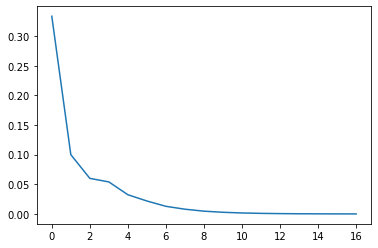

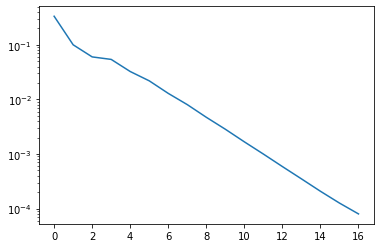

In [36]:
# %load solutions/RL2_exercise6.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

import gym
import gym.envs.toy_text.frozen_lake as fl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')
gamma = 0.9

def policy_eval_iter_mat2(pi, epsilon, max_iter):
    # build r and P
    r_pi = np.zeros((env.observation_space.n))
    P_pi = np.zeros((env.observation_space.n, env.observation_space.n))
    for x in range(env.observation_space.n):
        outcomes = env.unwrapped.P[x][pi[x]]
        for o in outcomes:
            p = o[0]
            y = o[1]
            r = o[2]
            P_pi[x,y] += p
            r_pi[x] += r*p
    # Compute V
    V = np.zeros((env.observation_space.n))
    W = np.zeros((env.observation_space.n))
    residuals = np.zeros((max_iter))
    for i in range(max_iter):
        W = r_pi + gamma * np.dot(P_pi, V)
        residuals[i] = np.max(np.abs(W-V))
        V[:] = W
        if residuals[i]<epsilon:
            residuals = residuals[:i+1]
            break
    return V, residuals

V_pi0, residuals = policy_eval_iter_mat2(pi0,1e-4,10000)
print(V_pi0)
plt.plot(residuals)
plt.figure()
plt.semilogy(residuals)
print("number of iterations:", residuals.size)
print("last residual", residuals[-1])


## <a id="optimality"></a>Optimality equation

Ok, so given a policy, we have a way (two actually) to compute its value function. Now we would like to find the optimal policy and we'd rather not enumerate all possible policies.

Let's introduce some notations and start with two trivial remarks. We write:
$$V^{\pi^*} = V^*, \quad Q^{\pi^*} = Q^*$$

Then we can note that:
1. $Q^*\left(s,a\right) = r\left(s,a\right) + \gamma \sum\limits_{s'\in S}p\left(s'|s,a\right) V^*\left(s'\right)$
2. If $\pi^*$ is an optimal policy, then $V^*\left(s\right) = Q^*\left(s,\pi^*\left(s\right)\right)$

From the first remark, we note that the maximum expected return one can get from a trajectory initiated in $s$ starts with the action $a$ that maximizes $Q^*(s,a)$. So:
<div class="alert alert-success"><b>Optimal greedy policy</b><br>
Any policy $\pi$ defined by $\pi(s) \in \arg\max\limits_{a\in A} Q^*(s,a)$ is an optimal policy.
</div>

Consequently, finding $\pi^*$ is equivalent to finding $Q^*$.

Here comes the key theorem of this class:
<div class="alert alert-success"><b>Bellman optimality equation</b><br>
The optimal value function obeys:
\begin{align*}
    V^*(s) &= \max\limits_{a\in A} \left[ r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} V^*(s') \right]\\
        &= \max\limits_{a\in A} \left[ r(s,a) + \gamma \sum\limits_{s'\in S} p(s'|s,a) V^*(s') \right]
\end{align*}
or in terms of $Q$-functions:
\begin{align*}
    Q^*(s,a) &= r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} \left[ \max_{a'\in A} Q^*(s',a') \right]\\
        &= r(s,a) + \gamma \sum\limits_{s'\in S}p(s'|s,a) \max\limits_{a'\in A} Q^*(s',a')
\end{align*}
</div>

As for the evaluation equation, we have actually written 4 times the same thing in the block above.  
We have also defined the **Bellman optimality operator $T^*$** (on $V$ and $Q$ functions) as:
<div class="alert alert-success"><b>Bellman optimality operator</b><br>
$$\left(T^*V\right)(s) = \max\limits_{a\in A} \left[ r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} V(s') \right]$$
$$\left(T^*Q\right)(s,a) = r(s,a) + \gamma \mathbb{E}_{s'\sim p(s'|s,a)} \left[ \max_{a'\in A} Q(s',a') \right]$$
</div>

So finding $V^*$ (resp. $Q^*$) boils down to solving $V= T^* V$ (resp. $Q = T^* Q$).

Why does that unfold intuitively from the previous remarks? Simply because of the Dynamic Programming principle: any subpath of an optimal path is itself optimal. That might still sound obscure. So let's say that if you start a trajectory in $s$ and if you know you will get the maximum value from any state $s'$ you reach, then the maximum value you can get from $s$ is precisely $\max\limits_{a\in A} \left[ r(s,a) + \gamma \sum\limits_{s'\in S} p(s'|s,a) V^*(s') \right]$. The actual proof is quite trickier but the key ideas are here.<br>
<br>
<div class="alert alert-success"><b>Properties of $T^*$</b><br>
<ol>
<li> $T^*$ is non-linear.<br>
<li> With $\gamma<1$, $T^*$ is a $\| \cdot \|_\infty$-contraction mapping over the $\mathcal{F}(S,\mathbb{R})$ (resp. $\mathcal{F}(S\times A,\mathbb{R})$) Banach space.<br>
$\Rightarrow$ With $\gamma<1$, $V^*$ (resp. $Q^*$) is the unique solution to the fixed point equation:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$V=T^* V$ (resp. $Q=T^* Q$).
</ol>
</div>

<div class="alert alert-warning"><b>Exercise</b><br>
    

Use the property above to compute $V^*$. To do this, you'll need to remember that since $T^*$ is a contraction mapping, the sequence $V_{n+1}=T^* V_n$ converges to $T^*$'s fixed point (which happens to be $V^*$ according to the property). Again, $\gamma = 0.9$.  
Plot the residuals and comment.
</div>

[0.06825413 0.06087521 0.07401647 0.05537531 0.09127533 0.
 0.11199644 0.         0.14496717 0.24718042 0.29939476 0.
 0.         0.37970721 0.63890028 0.        ]
number of iterations: 44
last residual 9.272422715012052e-05


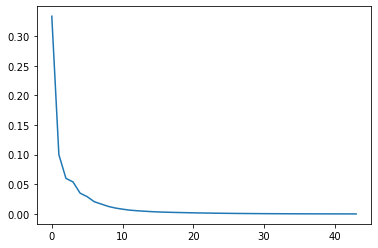

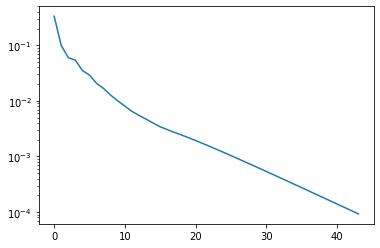

In [41]:
import gym
import gym.envs.toy_text.frozen_lake as fl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')
gamma = 0.9

def vf_otpim(V, epsilon, max_iter):
    W = np.copy(V)
    residuals = np.zeros((max_iter))
    
    for i in range(max_iter):
        for s in range(env.observation_space.n):
            Q = np.zeros(emv.action_space.n)
            for a in range(env.action_space.n):
                outcomes = env.unwrapped.P[s][a]
                for p, s2, r, _ in outcomes:
                    Q[a] += p * (r+gamma*V[s2])
            W[s] = np.max(Q)

        residuals[i] = np.max(np.abs(W-V))
        V[:] = W
        if residuals[i]<epsilon:
            residuals = residuals[:i+1]
            break
    return V, residuals

Vinit = np.zeros((env.observation_space.n))
Vstar, residuals = vf_optim(Vinit, 1e-4, 10000)
print(Vstar)
plt.plot(residuals)
plt.figure()
plt.semilogy(residuals)
print("number of iterations:", residuals.size)
print("last residual", residuals[-1])


[0.06825413 0.06087521 0.07401647 0.05537531 0.09127533 0.
 0.11199644 0.         0.14496717 0.24718042 0.29939476 0.
 0.         0.37970721 0.63890028 0.        ]
number of iterations: 44
last residual 9.272422715012052e-05


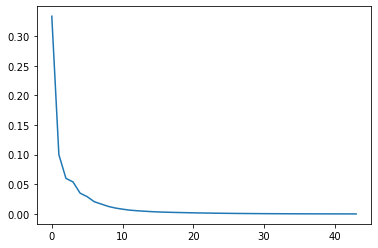

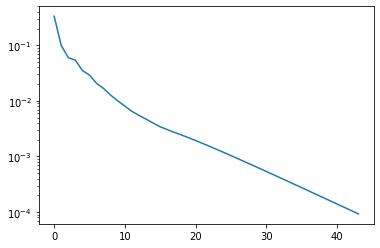

In [39]:
# %load solutions/RL2_exercise7.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

import gym
import gym.envs.toy_text.frozen_lake as fl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')
gamma = 0.9

def vf_optim(V, epsilon, max_iter):
    W = np.copy(V)
    residuals = np.zeros((max_iter))
    for i in range(max_iter):
        for s in range(env.observation_space.n):
            Q = np.zeros((env.action_space.n))
            for a in range(env.action_space.n):
                outcomes = env.unwrapped.P[s][a]
                for o in outcomes:
                    p  = o[0]
                    s2 = o[1]
                    r  = o[2]
                    Q[a] += p*(r+gamma*V[s2])
            W[s] = np.max(Q)
            #print(W[s])
        residuals[i] = np.max(np.abs(W-V))
        #print("abs", np.abs(W-V))
        np.copyto(V,W)
        if residuals[i]<epsilon:
            residuals = residuals[:i+1]
            break
    return V, residuals

Vinit = np.zeros((env.observation_space.n))
Vstar, residuals = vf_optim(Vinit, 1e-4, 10000)
print(Vstar)
plt.plot(residuals)
plt.figure()
plt.semilogy(residuals)
print("number of iterations:", residuals.size)
print("last residual", residuals[-1])


# <a id="model"></a>Model-based algorithms

Based on the analysis of the previous section, we introduce several algorithms that will lay a solid ground for model-free RL algorithms in the next classes.

## <a id="vi"></a>Value Iteration

Value iteration is actually the algorithm we defined in the `vf_optim` function in the correction of the previous exercise. It directly exploits the contraction mapping property of $T^*$ and iterates over value functions in order to converge to $V^*$. Once $V^*$ is found, finding the optimal policy is a matter of writing $Q^*$ and defining a policy that is $Q^*$-greedy.

Value Iteration was introduced by R. E. Bellman's seminal paper **[A Markovian Decision Process](https://www.jstor.org/stable/24900506)** (1957).

<div class="alert alert-warning"><b>Exercise:</b><br>
Write the pseudo-code of Value Iteration.
</div>

<div class="alert alert-danger"><a href="#answersVI" data-toggle="collapse"><b>Answer:</b></a><br>
<div id="answersVI" class="collapse">
    Input data: $V$, $\epsilon$<br>
    Init: $\Delta = \epsilon+1$<br>
    While $\Delta \geq \epsilon$:<br>
    &nbsp;&nbsp;&nbsp; For $s \in S$:  <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For $a\in A$:  <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $Q(s,a) = r(s,a) + \gamma \sum_{s'} p(s'|s,a) V(s')$ <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $V_{new}(s) = \max_a Q(s,a)$  <br>
    &nbsp;&nbsp;&nbsp; $\Delta = \| V_{new}-V \|_\infty$  <br>
    &nbsp;&nbsp;&nbsp; $V = V_{new}$  <br>
    Return $V$  <br>
</div>
</div>

<div class="alert alert-warning"><b>Exercise:</b><br>
    

Compute and display an optimal policy for the FrozenLake game, using Value Iteration. If you copy-paste the results of exercises 1, 2 and 7, you almost don't need to write any new code.  
Comment the obtained policy.
</div>

In [43]:
# %load solutions/RL2_exercise8.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

import gym
import gym.envs.toy_text.frozen_lake as fl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')
gamma = 0.9

def value_iteration(V,epsilon,max_iter):
    W = np.copy(V)
    residuals = np.zeros((max_iter))
    for i in range(max_iter):
        for s in range(env.observation_space.n):
            Q = np.zeros((env.action_space.n))
            for a in range(env.action_space.n):
                outcomes = env.unwrapped.P[s][a]
                for o in outcomes:
                    p  = o[0]
                    s2 = o[1]
                    r  = o[2]
                    Q[a] += p*(r+gamma*V[s2])
            W[s] = np.max(Q)
            #print(W[s])
        residuals[i] = np.max(np.abs(W-V))
        #print("abs", np.abs(W-V))
        np.copyto(V,W)
        if residuals[i]<epsilon:
            residuals = residuals[:i+1]
            break
    return V, residuals

def Q_from_V(V):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    for s in range(env.observation_space.n):
        for a in range(env.action_space.n):
            outcomes = env.unwrapped.P[s][a]
            for o in outcomes:
                p  = o[0]
                s2 = o[1]
                r  = o[2]
                Q[s,a] += p*(r+gamma*V[s2])
    return Q

def greedyQpolicy(Q):
    pi = np.zeros((env.observation_space.n),dtype=np.int)
    for s in range(env.observation_space.n):
        pi[s] = np.argmax(Q[s,:])
    return pi

def print_policy(pi):
    for row in range(env.unwrapped.nrow):
        for col in range(env.unwrapped.ncol):
            print(actions[pi[to_s(row,col)]], end='')
        print()
    return

Vinit = np.zeros((env.observation_space.n))
Vstar,residuals = value_iteration(Vinit,1e-4,1000)
Qstar = Q_from_V(Vstar)
print(actions)
print(Qstar)
pi_star = greedyQpolicy(Qstar)
print_policy(pi_star)
_=env.render()


{0: '←', 1: '↓', 2: '→', 3: '↑'}
[[0.06833507 0.0661214  0.0661214  0.05921504]
 [0.0387388  0.04268118 0.04046751 0.06094374]
 [0.07406644 0.06847409 0.07241647 0.0570801 ]
 [0.03881754 0.03881754 0.03322519 0.05543013]
 [0.09134899 0.07087275 0.06396639 0.04785884]
 [0.         0.         0.         0.        ]
 [0.11202337 0.08981843 0.11202337 0.02220494]
 [0.         0.         0.         0.        ]
 [0.07087275 0.11764428 0.10153672 0.14502688]
 [0.15740231 0.24722074 0.20373059 0.13330858]
 [0.29942314 0.26582421 0.22526902 0.10775306]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.18806629 0.30558225 0.37973637 0.26582421]
 [0.39540067 0.63891558 0.61482184 0.53706392]
 [0.         0.         0.         0.        ]]
←↑←↑
←←←←
↑↓←←
←→↓←

SFFF
FHFH
FFFH
HFFG


Those familiar with the principles of Dynamic Programming will note that Value Iteration is a Dynamic Programming algorithm that operates in value function space, monotonically hopping from value function to value function.

<div class="alert alert-warning"><b>Exercise:</b><br>
What is the time complexity of Value Iteration in terms of $|S|$ and $|A|$?
</div>

<div class="alert alert-danger"><a href="#answersComplexVI" data-toggle="collapse"><b>Answer:</b></a><br>
<div id="answersComplexVI" class="collapse">
$O(S^2 A)$
</div>
</div>

Value Iteration is often viewed as an algorithm that maintains a memory of a $V$ function and iterates until this function is close enough to $V^*$. Still, it is interesting (and will be useful later in the class) to rephrase the algorithm in alternate terms:  

Start with a state-action value function $Q$
- Define $\pi(s) = \arg\max_a Q(s,a)$ in all states and actions.  
  In the algorithm above, this operation is performed when the $\max_a$ is solved,  
  just the action is not explicitly stored.
- $Q \leftarrow T^\pi Q$,  
  that is, for all $s$ and $a$, $Q(s,a) \leftarrow r(s,a) + \gamma \mathbb{E}_{s'} \left[ Q(s',\pi(s')) \right]$.  
- repeat

So Value Iteration can be seen as picking the greedy action with respect to $Q$ and then updating $Q$ with just one application of $T^\pi$. This application of $T^\pi$ alone is not sufficient for $Q$ to reach $Q^\pi$ but it changes $Q$ and so it changes what the greedy action will be at the next iteration.

## <a id="pi"></a>Policy Iteration and Modified Policy Iteration

The Policy Iteration algorithm stems from the following remark. Suppose we have a policy $\pi$ and know its value function $V^\pi$ and state-action value function $Q^\pi$. Then, the non-stationary policy $\pi'$ that acts greedily with respect to $Q^\pi$ for the first time step and then follows $\pi$ has a value function $V^{\pi'}$ that is greater or equal to $V^\pi$ (equal if $\pi$ is optimal, strictly greater otherwise). Actually, the contraction property of $T^*$ insures that the stationary policy $\pi'$ that is greedy with respect to $Q^\pi$ is at least as good as $\pi$, that is $V^{\pi'}\geq V^\pi$. Consequently, the sequence of policies defined by $\pi_{n+1}(s) = \arg\max_{a\in A} Q^{\pi_n}(s,a)$ has a monotonically improving corresponding sequence of value functions $V^{\pi_n}$ and converges to $\pi^*$.<br>
<br>
Let's make this more simple with a drawing. Policy iteration alternates two phases:
1. Evaluate $\pi_n$ $\rightarrow Q^{\pi_n}$
2. Compute $\pi_{n+1}$ as the $Q^{\pi_n}$-greedy policy

<img src="img/policyiteration.png">

The process above defines a sequence of policies **and** value functions. Since, for finite state and action spaces, the number of policies is finite, Policy Iteration is guaranteed to converge in a finite number of iterations.

Policy Iteration was introduced in R. A. Howard's book **[Dynamic Programming and Markov Processes](https://psycnet.apa.org/record/1961-01474-000)** (1960).

Before we start implementing, let's first note that $\pi_{n+1} = \pi_n$ is not a valid termination criterion for Policy Iteration!

<div class="alert alert-warning"><b>Exercise:</b><br>
Can you explain why? What would be a sound termination criterion?
</div>

<div class="alert alert-danger"><a href="#answersPIstop" data-toggle="collapse"><b>Answer:</b></a><br>
<div id="answersPIstop" class="collapse">
    
The improvement step of policy iteration consists in computing $\pi_{n+1}(s) = \arg\max_a Q_n(s,a)$.  
But there is no reason for the maximizing action to be unique.  
In the case of multiple maximizing actions, the sequence of policies $\pi_n$ could very well oscillate between several equivalent optimal policies.  
This important lesson to keep from this is that the Bellman equation guarantees that $V^*$ is unique, but also that several policies might be optimal (and have value $V^*$).  
    
Also, oscillation between two quasi-equivalent policies might occur when the computation of $Q^{\pi_n}$ carries small errors.  
    

One solution is to define a tie-breaker between equivalent actions. However, even if it is a bit more costly computationally, it might be safer to compare $V^{\pi_{n+1}}$ and $V^{\pi_n}$ and allow a precision error of $\epsilon$. To observe this phenomenon, one could compare two versions of Policy Iteration: one that uses the `policy_eval_iter_mat` and one that uses the `policy_eval_lin` functions from exercice 6 of the previous class. The latter carries the errors of matrix inversion which causes the algorithm to never terminate and alternate between equivalent optimal policies.
</div>
</div>

<div class="alert alert-warning"><b>Exercise:</b><br>
Write the pseudo-code of Policy Iteration using the contraction property of $T^\pi$.  
For the sake if simplicity and despite the warning of the previous exercise, use $\pi_n=\pi_{n-1}$ as the termination condition.
</div>

<div class="alert alert-danger"><a href="#answersPI" data-toggle="collapse"><b>Answer:</b></a><br>
<div id="answersPI" class="collapse">
    Input data: $\pi$, $V$, $\epsilon$<br>
    Init: $\Delta = \epsilon+1$<br>
    Do:<br>
&nbsp;&nbsp;&nbsp; # Policy evaluation: apply $T^\pi$ to $V$ until precision $\epsilon$<br>
&nbsp;&nbsp;&nbsp; While $\Delta \geq \epsilon$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $V_{old} = V$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For $s \in S$:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $V(s) = r(s,\pi(s)) + \gamma \sum_{s'} p(s'|s,\pi(s)) V_{old}(s')$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\Delta = \| V-V_{old} \|_\infty$<br>
&nbsp;&nbsp;&nbsp; # Policy improvement<br>
&nbsp;&nbsp;&nbsp; $\pi_{old} = \pi$ <br>
&nbsp;&nbsp;&nbsp; For $s \in S$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For $a \in A$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $Q(s,a) = r(s,a) + \gamma \sum_{s'} p(s'|s,a) V(s')$ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\pi(s) = \max_a Q(s,a)$<br>
    While $\pi_{old} \neq \pi$ <br>
    Return $\pi$  <br>
</div>
</div>

The previous exercise was a little convoluted. We can make things simpler.

In all rigor, Policy Iteration is the algorithm that applies the Bellman evaluation operator an infinite number of times to $V$ so that it reaches $V^\pi$, then defines $\pi$ as the greedy policy with respect to $V$.

Obviously, an infinite number of applications of $T^\pi$ is not very practical. In the previous exercises, we controlled the error made in the convergence to $V^\pi$ with a parameter $\epsilon$, that allowed to perform a finite number of $T^\pi$ applications.

A simpler way is to define a certain number $m$ of applications of $T^\pi$. This provides the **Modified Policy Iteration** algorithm, that applies $T^\pi$ $m$ times to update $V$, then defines $\pi$ as the greedy policy with respect to $V$.

Modified Policy Iteration was introduced by M. L. Puterman and M. C. Shin in **[Modified Policy Iteration Algorithms for Discounted Markov Decision Problems](https://pubsonline.informs.org/doi/abs/10.1287/mnsc.24.11.1127)** (1978).

<div class="alert alert-warning"><b>Exercise:</b><br>
Write the pseudo-code of Modified Policy Iteration.
</div>

<div class="alert alert-danger"><a href="#answersMPI" data-toggle="collapse"><b>Answer:</b></a><br>
<div id="answersMPI" class="collapse">
    Input data: $\pi$, $m$<br>
    Init: $\Delta = \Delta_\pi = \epsilon+1$<br>
    While $\Delta_\pi \geq \epsilon$:<br>
&nbsp;&nbsp;&nbsp; # Policy evaluation, solve $V=T^\pi V$<br>
&nbsp;&nbsp;&nbsp; $V_{old} = V$<br>
&nbsp;&nbsp;&nbsp; For $i \in [1,m]$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For $s \in S$:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $V(s) \leftarrow (T^\pi V)(s)$<br>
&nbsp;&nbsp;&nbsp; # Policy improvement<br>
&nbsp;&nbsp;&nbsp; For $s \in S$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For $a \in A$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $Q(s,a) = r(s,a) + \gamma \sum_{s'} p(s'|s,a) V(s')$ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\pi(s) = \max_a Q(s,a)$<br>
    Return $\pi$  <br>
</div>
</div>

Interestingly, Modified Policy Iteration benefits from the same convergence properties as Policy Iteration.

<div class="alert alert-warning"><b>Exercise:</b><br>
What is Modified Policy Iteration with $m=1$?
</div>

<div class="alert alert-danger"><a href="#answersMPIVI" data-toggle="collapse"><b>Answer:</b></a><br>
<div id="answersMPIVI" class="collapse">

According to the last remark about Value Iteration, that's exactly Value Iteration!  
So Modified Policy Iteration is actually a continuum of algorithms between Value Iteration and Policy Iteration.
</div>
</div>

<div class="alert alert-warning">
    
**Exercise:**  
Compute and display an optimal policy for the FrozenLake game, using Modified Policy Iteration, with $m=500$ and $\gamma=0.9$.  
Since you will use a fixed number of iterations for the resolution of $V=T^\pi V$, you could reuse function `policy_eval_iter_mat` from the correction of exercise 5 for instance. Recall also that exercise 1 transformed a $V$ function into a $Q$ function, and that exercise 2 picked the greedy policy from a $Q$ function.
</div>

In [56]:
import gym
import gym.envs.toy_text.frozen_lake as fl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')
gamma = 0.9
m = 500

def policy_eval_iter_mat(pi, max_iter=500, gamma=0.9):
    # build r and P
    r_pi = np.zeros((env.observation_space.n))
    P_pi = np.zeros((env.observation_space.n, env.observation_space.n))
    for x in range(env.observation_space.n):
        outcomes = env.unwrapped.P[x][pi[x]]
        for o in outcomes:
            p = o[0]
            y = o[1]
            r = o[2]
            P_pi[x,y] += p
            r_pi[x] += r*p
    # Compute V
    V = np.zeros((env.observation_space.n))
    for i in range(max_iter):
        V = r_pi + gamma * np.dot(P_pi, V)
    return V

def modified_policy_iteration(pi0,m,max_iter):
    policies = np.zeros((max_iter, env.observation_space.n))
    policies[0,:] = np.copy(pi0)
    for i in range(max_iter-1):
        Vpi = policy_eval_iter_mat(policies[i],m)
        Qpi = Q_from_V(Vpi)
        policies[i+1,:] = greedyQpolicy(Qpi)
        if np.array_equal(policies[i,:],policies[i+1,:]):
            policies = policies[:i,:]
            break
    return policies


pi0 = fl.RIGHT*np.ones((env.observation_space.n))
print_policy(pi0)
policies = modified_policy_iteration(pi0,m,10)
print("number of iterations:", policies.shape[0])
print_policy(policies[-1,:])
_=env.render()

→→→→
→→→→
→→→→
→→→→
number of iterations: 2
←↑←←
←←←←
↑↓←←
←→↓←

SFFF
FHFH
FFFH
HFFG


In [47]:
# %load solutions/RL2_exercise9.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

import gym
import gym.envs.toy_text.frozen_lake as fl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')
gamma = 0.9
m = 500

def Q_from_V(V):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    for s in range(env.observation_space.n):
        for a in range(env.action_space.n):
            outcomes = env.unwrapped.P[s][a]
            for o in outcomes:
                p  = o[0]
                s2 = o[1]
                r  = o[2]
                Q[s,a] += p*(r+gamma*V[s2])
    return Q

def greedyQpolicy(Q):
    pi = np.zeros((env.observation_space.n),dtype=np.int)
    for s in range(env.observation_space.n):
        pi[s] = np.argmax(Q[s,:])
    return pi

def modified_policy_iteration(pi0,m,max_iter):
    policies = np.zeros((max_iter, env.observation_space.n))
    policies[0,:] = np.copy(pi0)
    for i in range(max_iter-1):
        Vpi = policy_eval_iter_mat(policies[i],m)
        Qpi = Q_from_V(Vpi)
        policies[i+1,:] = greedyQpolicy(Qpi)
        if np.array_equal(policies[i,:],policies[i+1,:]):
            policies = policies[:i,:]
            break
    return policies

def print_policy(pi):
    for row in range(env.unwrapped.nrow):
        for col in range(env.unwrapped.ncol):
            print(actions[pi[to_s(row,col)]], end='')
        print()
    return

pi0 = fl.RIGHT*np.ones((env.observation_space.n))
print_policy(pi0)
policies = modified_policy_iteration(pi0,m,10)
print("number of iterations:", policies.shape[0])
print_policy(policies[-1,:])
_=env.render()

→→→→
→→→→
→→→→
→→→→
number of iterations: 2
←↑←←
←←←←
↑↓←←
←→↓←

SFFF
FHFH
FFFH
HFFG


<div class="alert alert-warning"><b>Exercise:</b><br>
What is the time complexity of Policy Iteration in terms of $|S|$ and $|A|$?
</div>

<div class="alert alert-danger"><a href="#answersComplexPI" data-toggle="collapse"><b>Answer:</b></a><br>
<div id="answersComplexPI" class="collapse">
$O(|S|^2 |A|)$
    
Policy Iteration has the same time complexity as Value Iteration. In practice, for finite state and action spaces, Policy Iteration converges in a finite number of steps (contrarily to Value Iteration). But each of these steps requires the resolution of $V = T^\pi V$ which is where the real computational cost is.  
</div>
</div>

As for Value Iteration, those familiar with Dynamic Programming will remark that Policy Iteration is a Dynamic Programming algorithm in policy space, monotonically hopping from policy to policy.

# <a id="adp"></a>Approximate Dynamic Programming

Value Iteration and Policy Iteration are the two key Dynamic Programming methods that form the basis of model-based MDP resolution.

But when the state space is just too large to be enumerated (too many discrete states or continuous state space for instance), lookup table representations for $V$ and $Q$ just become impractical and it becomes necessary to turn towards function approximators.

In this section, we suppose we have a *function approximation* operator or a *supervised learning* algorithm $\mathcal{A}$. This operator $\mathcal{A}$ transforms a function into another function: all supervised learning methods that learn from samples fall into this category, but also piecewise polynomial approximations of more complex functions for instance.

## <a id="avi"></a>Approximate Value Iteration

Let's define the Approximate Value Iteration algorithm, which defines the sequence:
$$V_{n+1} = \mathcal{A} T^* V_n.$$

If nothing is known about $\mathcal{A}$, then nothing much can be said about this sequence.

However, let us suppose that $\mathcal{A}$'s approximation error is uniformly bounded, that is, for all $f \in \mathcal{F}(S,\mathbb{R}), \ \| f-Af \|_\infty \leq \epsilon$.

In this case, the first important result is that Approximate Value Iteration does not converge. However, one can prove that $V_n$ reaches a neighborhood of $V^*$. Specifically:
$$\lim_{n\rightarrow \infty} \| V^* - V_n \|_\infty \leq \frac{\epsilon}{1-\gamma}.$$

More importantly:  
Let $\pi_n$ be the greedy policy with respect to $V_n$. Then:
$$\|V^*-V^{\pi_n}\|_\infty \leq \frac{2\gamma}{1-\gamma} \|V^*-V_n\|_\infty.$$

And consequently:
$$\lim_{n\rightarrow \infty} \|V^*-V^{\pi_n}\|_\infty \leq \frac{2\gamma\epsilon}{(1-\gamma)^2}.$$

So Approximate Value Iteration does not necessarily converge but reaches policies whose values are close to optimal. These results are proven in the **[Neuro-dynamic programming](http://athenasc.com/ndpbook.html)** book by D. P. Bertsekas and J. Tsitsiklis (1996).

<div class="alert alert-warning">
    
**Exercise:**  
Consider an MDP whose rewards are all in the $[0,1]$ interval and take $\gamma = 0.9$.  
What is the maximum range of values for any $V^\pi(s)$?  
Suppose we have a function approximator whose error is uniformly upper-bounded by $\epsilon=0.1$.  
Compare the neighborhood size from the equation above to the largest value $V^\pi(s)$ can take and comment.
</div>

<div class="alert alert-danger"><a href="#AVI" data-toggle="collapse"><b>Answer:</b></a><br>
<div id="AVI" class="collapse">

The smallest cumulated return we can get of obviously zero.  
The largest cumulated return is reached if we receive a reward of 1 at each time step.  
In this case, $V^\pi(s) = \sum_{t=0}^\infty \gamma^t = \frac{1}{1-\gamma}$.  
With $\gamma = 0.9$ this upper bound is $\frac{1}{1-\gamma}=10$.

Since we suppose $\epsilon=0.1$, that is roughly a 1% error in function approximation.
    
With $\epsilon=0.1$ we have a neighborhood radius of $\frac{2\gamma\epsilon}{(1-\gamma)^2}=18$.  
If we had taken $\gamma=0.99$, the upper bound on $V^\pi$ would have been 100 and the neighborhood radious would have been 1980.

So the bound above does not really provide strong guarantees. Fortunately, in practice, most Approximate Value Iteration application behave better than this worst-case example.
</div>
</div>

Most supervised learning algorithms minimize a loss that is expressed as a weighted $L_2$ norm. Thus, they don't explicitly provide guarantees in $L_\infty$ norm. R. Munos provided **[error bounds for approximate value iteration](https://www.aaai.org/Papers/AAAI/2005/AAAI05-159.pdf)** in the general case of weighted $L_p$ norms. Those bounds are similar to the one in $L_\infty$ norm, thus justifying the use of supervised learning techniques (such as neural networks learning from samples for instance) in Approximate Value Iteration.

## <a id="api"></a>Approximate Policy Iteration

Approximate Policy Iteration consists in solving the evaluation equation up to a certain precision $\epsilon$ and then taking a greedy improvement step.

We write $V_n$ the approximation of $V^{\pi_n}$ at the end of an evaluation phase in Policy Iteration and suppose that the approximation error is uniformly bounded:
$$\| V^{\pi_n} - V_n \|_\infty \leq \epsilon.$$

Then it is known that, even though the sequence of greedy policies $\pi_n$ does not converge, it oscillates among a set of policies such that:
$$\lim_{n\rightarrow \infty} \|V^*-V^{\pi_n}\|_\infty \leq \frac{2\gamma\epsilon}{(1-\gamma)^2}.$$

This result is proven in the **[Neuro-dynamic programming](http://athenasc.com/ndpbook.html)** book by D. P. Bertsekas and J. Tsitsiklis (1996).

So the neighborhood reached has the same size as that of Approximate Value Iteration.

Similar bounds **[error bounds for approximate policy iteration](https://www.aaai.org/Papers/ICML/2003/ICML03-074.pdf)** in weighted $L_p$ norms were provided by R. Munos (2003), thus justifying the use of supervised learning techniques (such as neural networks learning from samples for instance) in Approximate Policy Iteration.

# <a id="lp"></a>Linear Programming

An alternative way of finding $V^*$ is by casting the optimality equation as a linear optimization problem. This formulation is mainly given for your curiosity and we will not study it any further.<br>
<br>
Recall the optimality equation:
$$\forall s\in S, V(s)=\max\limits_{a\in A} \left[r(s,a) + \gamma \sum\limits_{s'\in S} p(s'|s,a) V(s')\right]$$

The key remark to transform this into a linear program is to rephrase it as "$V^*$ is the smallest value that dominates over all policy values". This can be written as:
$$\left\{ \begin{array}{c}
\min \sum\limits_{s\in S} V(s)\\
s.t. \ \forall \pi, \ V \geq T^\pi V
\end{array} \right.$$

"For all $\pi$" means for all possible association $s\leftrightarrow a$, so this can be expanded as:
$$\left\{ \begin{array}{c}
\min \sum\limits_{s\in S} V(s)\\
s.t. \ \forall (s,a)\in S\times A, \quad V(s) - \gamma \sum\limits_{s'\in S} p(s'|s,a)V(s') \geq r(s,a)
\end{array}\right.$$

Which, finally, is a linear program with $|S|$ variables and $|S||A|$ constraints.

# <a id="asyncdp"></a>Asynchronous Dynamic Programming

We have seen that Value Iteration and Policy Iteration are Dynamic Programming algorithms. They follow a path, respectively in value function and in policy space that leads to $V^*$ and $\pi^*$. But we can remark that they both perform *state-wise* operations such as:

- $Q(s,a) \leftarrow r(s,a) + \gamma \sum_{s'} p(s'|s,a) V(s')$
- $V(s) \leftarrow \max_{a} r(s,a) + \gamma \sum_{s'} p(s'|s,a) V(s')$
- $\pi(s) \leftarrow \arg\max_a Q^{\pi}(s,a)$
- $V(s) \leftarrow r(s,\pi(s)) + \gamma \sum_{s'} p(s'|s,\pi(s)) V(s')$

These state-wise operations are called Bellman backups.

Let's use $V$ functions to describe Value Iteration. We can define the Bellman backup operator:
- `BBV(V,s): return` $\max_{a} r(s,a) + \gamma \sum_{s'} p(s'|s,a) V(s')$  
  `BBV` is the operation performed in every state, in one pass of Value Iteration

Alternatively, we can operate only on $Q$ functions and define the corresponding Bellman backup operators:
- `BBQ(Q,pi,s,a): return` $r(s,a) + \gamma \sum_{s'} p(s'|s,a) Q(s',\pi(s'))$  
  `BBQ` serves in all *evaluation* steps,
- `BBpi(Q,s): return` $\max_a Q(s,a)$ and $\arg\max_a Q(s,a)$  
  `BBpi` serves in all *improvement* steps.

<div class="alert alert-warning">
    
**Exercise:**  
Suppose we maintain a memory of a function `V`.
Using `BBV`, rewrite Value Iteration.
</div>

<div class="alert alert-danger"><a href="#answersbackupsVI" data-toggle="collapse"><b>Answer:</b></a><br>
<div id="answersbackupsVI" class="collapse">
    

Value Iteration:<br><code>
V(s) = Vinit(s) for all s
while error>epsilon
  for s in S
    for a in A
      W(s) = BBV(V,s)
  error = norm(W-V)
  V = W</code>
</div>
</div>

<div class="alert alert-warning">
    
**Exercise:**  
Suppose we maintain a memory of a function `Q` and a policy `pi`. 
Using `BBQ` and `BBpi`, rewrite Value Iteration and Modified Policy Iteration.
</div>

<div class="alert alert-danger"><a href="#answersbackups" data-toggle="collapse"><b>Answer:</b></a><br>
<div id="answersbackups" class="collapse">
    

Value Iteration:<br><code>
V(s) = Vinit(s) for all s
while error>epsilon
  for s in S
    for a in A
      Qnew(s,a) = BBQ(Q,pi,s,a)
    W(s), pi(s) = BBpi(Qnew,s)
  error = norm(W-V)
  V = W</code>
<br><br>
Modified Policy Iteration:<br><code>
while(pi not constant)
  Q(s,a) = 0 for all s,a
  while error>epsilon
    for k in [1,m]
      for s,a in SxA
        Qnew(s,a) = BBQ(s,a)
  for s in S
    V, pi = BBpi(s)</code>
</div>
</div>

## <a id="asyncvi"></a>Asynchronous Value Iteration

Let's take the pseudo-code of Value Iteration using a $V$ function from the exercises above. Why don't we perform directly `V(s) = BBV(V,s)`, instead of relying on the intermediate `W` function? In other terms, if we have already performed a backup in $s$, why couldn't we reuse it in the next backup? Doing so is actually called **Gauss-Seidl Value Iteration** and it opens the door to a much wider class of algorithms called Asynchronous Value Iteration.

<div class="alert alert-warning">
    
**Exercise:**  
Using `BBV`, write Gauss-Seidl Value Iteration.
</div>

<div class="alert alert-danger"><a href="#answersbackupsGSVI" data-toggle="collapse"><b>Answer:</b></a><br>
<div id="answersbackupsGSVI" class="collapse">
    

Value Iteration:<br><code>
V(s) = Vinit(s) for all s
while error>epsilon
  for s in S
    for a in A
      V(s) = BBV(V,s)
  error = norm(W-V)
  V = W</code>
</div>
</div>

It is crucial to note that in Gauss-Seidl Value Iteration, the order in which the states are considered for backups greatly affects of rewards are propagated through the state space and how the sequence of value functions converges to $V^*$.  

But still, in Gauss-Seidl Value Iteration, states are updated once per sweep over the state space.
Why wouldn't we update the value of some states more often than others? Would the overall value function still converge to $V^*$? A very powerful theorem actually states what follows.
<div class="alert alert-success">
    
**Convergence of Asynchronous Value Iteration**
    
As long as every state is visited infinitely often by the `V(s)` $\leftarrow$ `BBV(V,s)` operation as time tends to $+\infty$, the value function $V$ converges to $V^*$
</div>

Consequently, we could pick states totally randomly in order to perform Bellman backups on $V$, and $V$ would still converge to $V^*$. Although picking states randomly for that purpose seems like a bad idea, identifying a good ordering for the backups can lead to drastic improvements in convergence speed. This is the key idea of **Asynchronous Value Iteration** and has justified (among other things) the popular **Prioritized Sweeping** and **Real-Time Dynamic Programming** algorithms.

## <a id="asyncpi"></a>Asynchronous Policy Iteration

Let's now take the pseudo-code of Modified Policy Iteration from the exercises above, using `BBQ` and `BBpi`. The evaluation step and the improvement step are clearly separated. But we know already that if we require the evaluation step to have infinite precision, $m$ needs to tend to $\infty$. We also know that if we take an arbitrary value for $m$ and the algorithm still converges.

Can we write introduce the idea of asynchronous Bellman backups in Policy Iteration? As in the value iteration case, can we update the value or policy of a given state in any ordering? Our most general theorem for Asynchronous Dynamic Programming in MDP states the following.
<div class="alert alert-success"> 
    
**Convergence of Asynchronous Policy Iteration**
    
As long as every state is visited infinitely often by the `Q(s,a)` $\leftarrow$ `BBQ(Q,pi,s,a)`  and the `pi(s)` $\leftarrow$ `BBpi(Q,s)` operations as time tends to $+\infty$, the value function $Q$ and the policy $\pi$ converge respectively to $Q^*$ and $\pi^*$
</div>

That is the most general framework one can give for **Asynchronous Dynamic Programming** in MDP resolution. It is often called **Asynchronous Policy Iteration**.<br>

Overall, Asynchronous Policy Iteration can be written:
`
Do forever:
  Pick a set SAset={(s,a)}
  For s,a in SAset:
    Q(s,a) = BBQ(Q,pi,s,a)
  Pick a set Sset={s}:
  For s in Sset:
    pi(s) = BBpi(Q,s)
`

So Asynchronous Policy Iteration encompasses all the previous algorithms, both synchronous (VI, PI, MPI) and asynchronous (Asynchronous VI).

Of course, just as for Asynchronous Value Iteration, the most important thing with Asynchronous Policy Iteration is the order in which we pick the states and actions for backups.